In [74]:
import pandas as pd
from scipy import stats
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
#import data
data = pd.read_csv("Foreign_Exchange_Rates.csv",parse_dates=True)

In [143]:
#Data Wrangling
df = data
cols = df.iloc[:,1:].columns

#Drop ND records
for col in cols:
    df = df[df[col] != 'ND']

#Convert datatypes
df['Time Serie'] = pd.to_datetime(df['Time Serie'])
for col in cols:
    df[col] = pd.to_numeric(df[col])
#df.dtypes

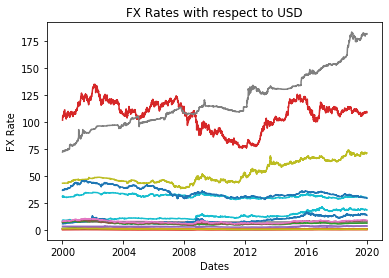

In [76]:
#Plot the time series
for i in range(len(cols)):
    if cols[i]!='KRW':
        x = df.iloc[:,0]
        y = df.iloc[:,i+1]
        plt.plot(x, y, label = df[cols[i]])
plt.xlabel('Dates')
# Set the y axis label of the current axis.
plt.ylabel('FX Rate')
# Set a title of the current axes.
plt.title('FX Rates with respect to USD')
# show a legend on the plot
#plt.legend()
# Display a figure.
plt.show()

In [4]:
# Statistical measures
df.describe()

,AUD,EUR,NZD,GBP,BRL,CAD,CNY,HKD,INR,KRW,...,SGD,DNK,JPN,MYS,NOR,SWE,LKA,CHF,TWN,THA
count,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,...,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000
mean,1.332160,0.844014,1.543820,0.640466,2.548483,1.230503,7.200544,7.782643,52.726249,1125.552552,...,1.480412,6.286814,106.589230,3.651129,7.076004,7.899849,119.116291,1.150475,31.764830,35.522574
std,0.269974,0.126826,0.337414,0.082562,0.724234,0.182136,0.820413,0.027551,9.678708,103.406953,...,0.189003,0.943430,13.211723,0.378635,1.226730,1.201841,25.352131,0.249145,1.671172,4.563843
min,0.906900,0.624600,1.134600,0.473800,1.537500,0.916800,6.040200,7.708500,38.480000,903.200000,...,1.200700,4.660500,75.720000,2.937000,4.946700,5.834600,72.300000,0.729600,28.500000,28.600000
25%,1.115200,0.751000,1.323800,0.587500,1.945650,1.055850,6.475550,7.756400,45.250000,1067.570000,...,1.342900,5.593550,100.080000,3.290500,5.996600,6.852700,100.380000,0.966800,30.350000,31.780000
50%,1.311300,0.815600,1.442600,0.636500,2.329100,1.237100,6.860000,7.780600,48.100000,1127.790000,...,1.408400,6.072500,109.020000,3.800000,6.785000,7.748300,112.300000,1.040300,31.730000,34.010000
75%,1.430400,0.900150,1.591200,0.692400,3.130000,1.335700,8.276500,7.799800,62.440000,1180.000000,...,1.679350,6.714850,116.815000,3.800000,8.279100,8.744300,132.650000,1.269150,32.980000,39.410000
max,2.071300,1.209200,2.551000,0.828700,4.259400,1.612800,8.280000,7.849900,74.330000,1570.100000,...,1.854000,9.005000,134.770000,4.496000,9.589000,11.027000,182.800000,1.825000,35.210000,45.820000


In [17]:
#Histogram
#for i in range(len(cols)):
#    plt.hist(df.iloc[:,i+1],10, histtype='bar', align='mid', color='g', label=cols[i],edgecolor='black')
#    plt.legend(loc=2)
#    plt.title('Histogram of score')
#    plt.show()

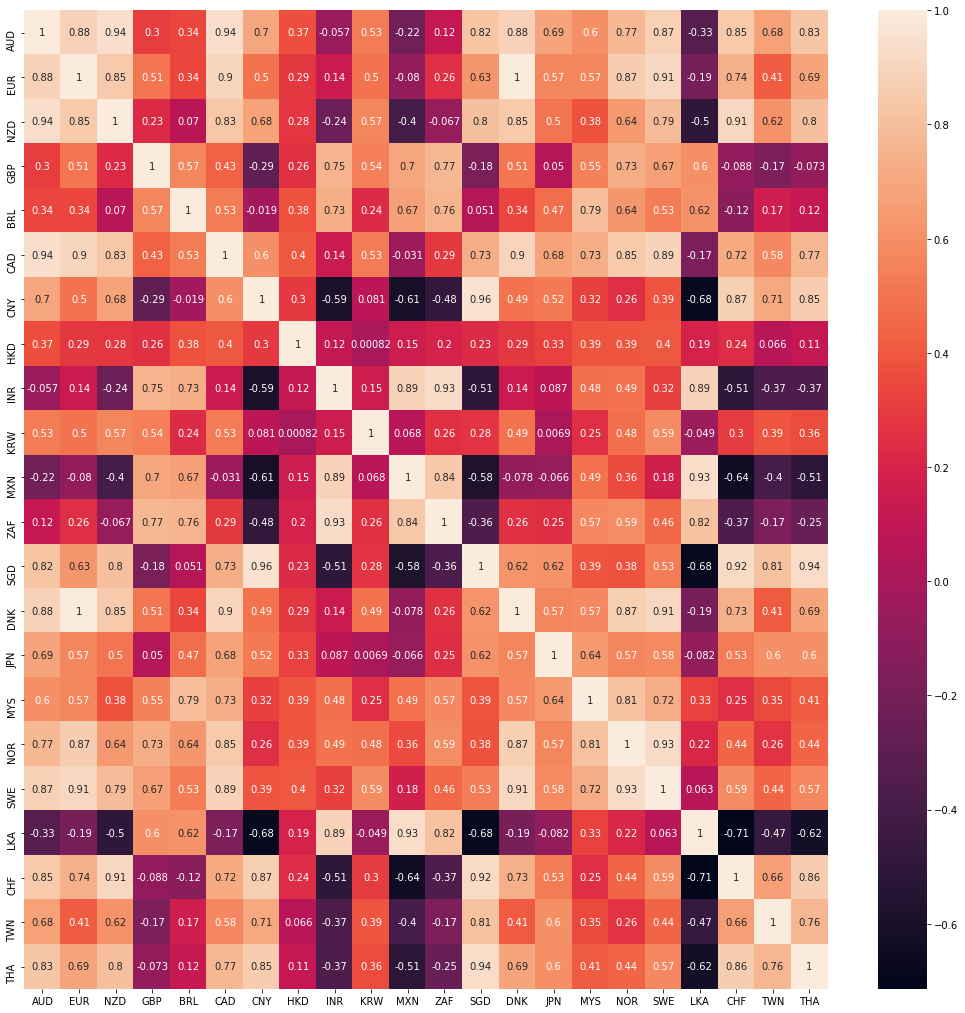

In [77]:
#Heatmap
#print(df.corr())
fig, ax = plt.subplots(figsize=(18,18)) 
sn.heatmap(df.corr(), annot=True, ax=ax)

DNK  EUR    0.999917
SGD  CNY    0.955519
AUD  CAD    0.943172
     NZD    0.942298
SGD  THA    0.938192
LKA  MXN    0.933842
NOR  SWE    0.932031
ZAF  INR    0.926790
SGD  CHF    0.924163
dtype: float64

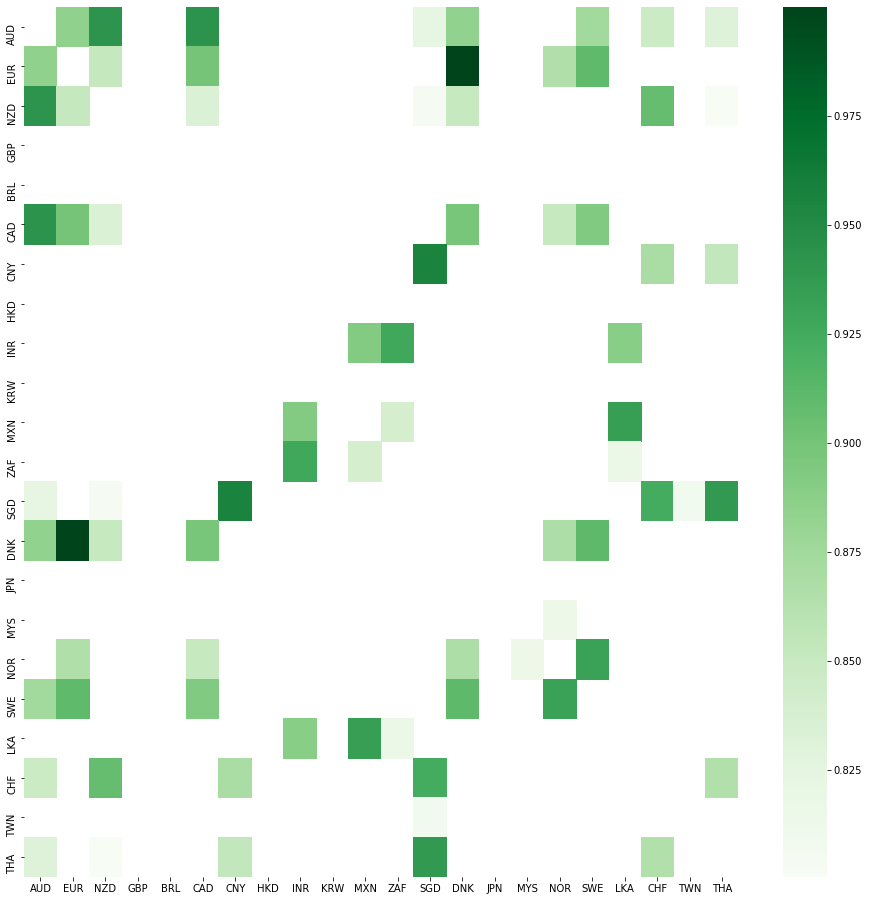

In [78]:
#Top 10 correlated currency pair
corr = df.corr()
corr[corr == 1] = 0
Hcorr = corr[abs(corr)>0.8]
plt.figure(figsize=(16,16))
sn.heatmap(kot, cmap="Greens")
#Remove duplicates
TopHcorr = Hcorr.unstack().sort_values(ascending=False).head(20).iloc[:-2:2]
TopHcorr

In [178]:
#Forecasting Forex rates using Auto Regressive Moving Average Model — ARIMA

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

Test Mean Squared Error (ARIMA using p,d,q = 3,1,0): 0.22106


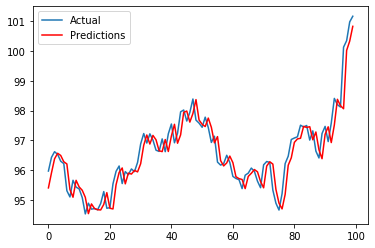

In [196]:
#Size of exchange rates
NumberOfPoints = len(df)

#Use 65% of data as training, rest 35% to Test model
TrainingSize = int(NumberOfPoints * 0.65)
TrainingData = df[0:TrainingSize]
TrainingData = TrainingData['AUD']*100
#TestData = df[TrainingSize:NumberOfPoints]
TestData = df[TrainingSize:TrainingSize+100]
TestData = TestData['AUD']*100
#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()

#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
    #print('Timepoint=%f' %(timepoint))
    ActualValue =  TestData[timepoint:timepoint+1].values
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 3,1,0)    
    #print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)

#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
print('Test Mean Squared Error (ARIMA using p,d,q = 3,1,0): %.5f' % Error)

# plot
plt.plot(TestData.values, label='Actual')
plt.plot(Predictions, color='red',label='Predictions')
plt.legend(loc='best')
plt.show()

Test Mean Squared Error (ARIMA using p,d,q = 1,1,1): 0.21917


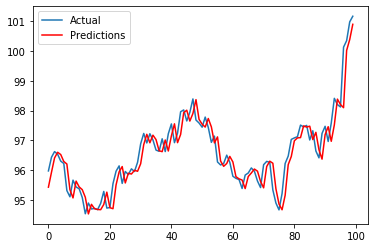

In [195]:
#ARIMA p,d,q = 1,1,1
#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()

#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
    #print('Timepoint=%f' %(timepoint))
    ActualValue =  TestData[timepoint:timepoint+1].values
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 1,1,1)    
    #print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)

#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
print('Test Mean Squared Error (ARIMA using p,d,q = 1,1,1): %.5f' % Error)

# plot
plt.plot(TestData.values, label='Actual')
plt.plot(Predictions, color='red',label='Predictions')
plt.legend(loc='best')
plt.show()

Test Mean Squared Error (ARIMA using p,d,q = 2,1,1): 0.21920


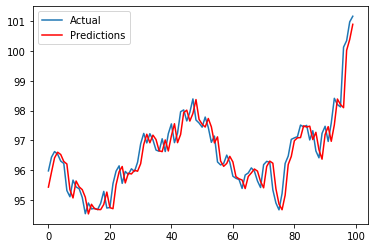

In [200]:
#ARIMA p,d,q = 2,1,1
#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()

#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
    #print('Timepoint=%f' %(timepoint))
    ActualValue =  TestData[timepoint:timepoint+1].values
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 2,1,1)    
    #print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)

#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
print('Test Mean Squared Error (ARIMA using p,d,q = 2,1,1): %.5f' % Error)

# plot
plt.plot(TestData.values, label='Actual')
plt.plot(Predictions, color='red',label='Predictions')
plt.legend(loc='best')
plt.show()

Test Mean Squared Error (ARIMA using p,d,q = 3,1,1): 0.22020


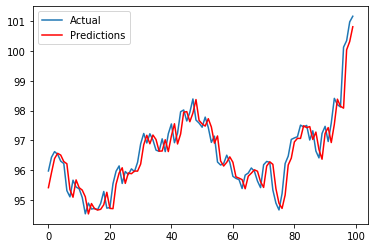

In [199]:
#ARIMA p,d,q = 3,1,1
#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()

#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
    #print('Timepoint=%f' %(timepoint))
    ActualValue =  TestData[timepoint:timepoint+1].values
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 3,1,1)    
    #print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)

#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
print('Test Mean Squared Error (ARIMA using p,d,q = 3,1,1): %.5f' % Error)

# plot
plt.plot(TestData.values, label='Actual')
plt.plot(Predictions, color='red',label='Predictions')
plt.legend(loc='best')
plt.show()